# dataset Generator

In [66]:
#   %pip install --upgrade pip

#   %pip install scikit-learn
#   %pip install seaborn


In [67]:
import os
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from pandas import DataFrame
import seaborn as sns
import pandas as pd



Set Default Parameters 

(don't change the params here, but do it below, this way we are sure that they all exist before calling the generating function)

In [68]:
#   Default number of points
n = 1000

#   Default number of dimensions of each point
d = 2

#   Default number of clusters
k = 7

#   Default cluster std 
c_std = 0.5

Modify parameters :

In [69]:
n = 1000
d = 3
k = 7
c_std = 1.2

Verify parameters validity :

In [70]:
valid_parameters = True
min_dimensions = 2  # hard coded in printf
min_centers = 1
min_nodes = 3
min_cluster_std = 0
max_cluster_std = 3


if( d < 2  or  (not isinstance(d, int)) ):
    print("dimensions need to be at the least (2D)  %i , you called for : %.9f,  this is unaccettable" % (min_dimensions, d))
    valid_parameters = False

if( k < 1  or  (not isinstance(k, int)) ):
    print("there need to be at the least 1 centers (bruh), you called for : %.9f,  this is unaccettable" % (k))
    valid_parameters = False

if( n < min_nodes  or  n < k  or  (not isinstance(n, int)) ):
    print("need to be at the least as many nodes as centers <i.e. %i>, and in general at the least <%i nodes> ; you called for : <%.9f nodes>,  this is unaccettable" % (max(min_centers, k), min_nodes, n))
    valid_parameters = False

if( c_std < min_cluster_std  or  c_std > max_cluster_std  or  (not isinstance(c_std, float)) ):
    print("cluster_std must be in range [%9f, %9f], you called %9f,  this is unaccettable" % ( min_cluster_std, max_cluster_std, c_std))
    valid_parameters = False

In [71]:
if valid_parameters != True :
    raise SystemExit("Stop right there!")

In [72]:
print("ciao", os.path.exists(".."))
print("ciao", os.path.exists("../data"))
print("ciao", os.path.exists("../data/"))

ciao True
ciao True
ciao True


Test existence folder, or generate folder, and set file-names

In [73]:
base_path = ".."
data_folder = "data"

# create ../data/
if not os.path.exists(f'{base_path}/{data_folder}'):
    print(f'folder {base_path}/{data_folder} not found, I shall create it (once)')
    os.mkdir(f'{base_path}/{data_folder}')


genera_plots_folder = "plots"
#   folder for 2D and 3D plots  :
# create ../plots/
if not os.path.exists(f'{base_path}/{genera_plots_folder}'):
    print(f'folder {base_path}/{genera_plots_folder} not found, I shall create it (once)')
    os.mkdir(f'{base_path}/{genera_plots_folder}')

# create ../plots/datasetPlots
dataset_plot_folder = "datasetPlots"
if not os.path.exists(f'{base_path}/{genera_plots_folder}/{dataset_plot_folder}'):
    print(f'folder {base_path}/{genera_plots_folder}/{dataset_plot_folder} not found, I shall create it (once)')
    os.mkdir(f'{base_path}/{genera_plots_folder}/{dataset_plot_folder}')


combination_name = f"n_{n}_d_{d}_k_{k}_cstd_{c_std}"

In [74]:
#   https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html
#   sklearn.datasets.make_blobs(n_samples=100, n_features=2, *, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)
#   returns : 
#       Xndarray of shape (n_samples, n_features)
#       The generated samples.
#       
#       yndarray of shape (n_samples,)
#       The integer labels for cluster membership of each sample.
#       
#       centersndarray of shape (n_centers, n_features)
#       The centers of each cluster. Only returned if return_centers=True.

RND_random_seed = 3

points, y = make_blobs(n_samples=n, centers=k, n_features=d, random_state=RND_random_seed, cluster_std=c_std, shuffle=True)

df = pd.DataFrame(points)

df = df.apply(lambda x: (x - x.min()) / (x.max() - x.min()))



In [75]:
# save dataset

#   os.mkdir(f'{base_path}/{data_folder}')
df.to_csv(f'{base_path}/{data_folder}/{combination_name}_dataset_test.csv', index=False, header=False)

In [76]:
centroids = df.sample(n=n)
centroids.index = range(n)

centroids.to_csv(f'{base_path}/{data_folder}/{combination_name}_centroids_test.csv', index=True, header=False)

Plot the dataset

In [77]:
if d!=2 and d!=3 :
    raise SystemExit("End, too many dimensions to plot, but the datasets have been created, ggs")

In [78]:
palette = sns.color_palette("hsv", n_colors=k)

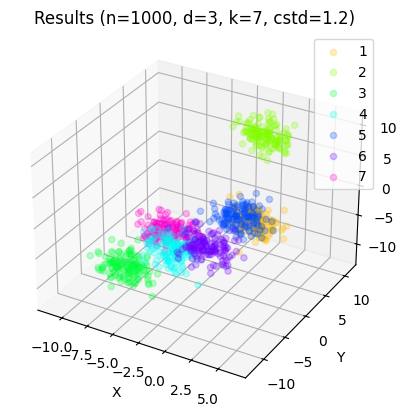

In [80]:
if d == 2:
    # Create a DataFrame
    df = DataFrame(dict(x=points[:, 0], y=points[:, 1], label=y))

     # Create a 2D scatterplot of the data points with different colors for each label
    fig, ax = plt.subplots()
    grouped = df.groupby('label')
    
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key+1, color=palette[key])

elif d == 3:
    # Create a DataFrame
    df = DataFrame(dict(x=points[:, 0], y=points[:, 1], z=points[:, 2], label=y))

    # Create a 3D scatterplot of the data points with different colors for each label
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    grouped = df.groupby('label')
    
    for key, group in grouped:
        ax.scatter(group['x'], group['y'], group['z'], label=key+1, color=[palette[key]], alpha=0.25)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

else:
    exit(0)

# Set labels and legend
plt.legend()
plt.title(f"Results (n={n}, d={d}, k={k}, cstd={c_std})")

# Save the plot as an image file
#   os.mkdir(f'{base_path}/{genera_plots_folder}/{dataset_plot_folder}')
plt.savefig(f'{base_path}/{genera_plots_folder}/{dataset_plot_folder}/{combination_name}_dataset_plot.png')